In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

from warnings import filterwarnings

In [239]:
df=pd.read_excel('Downloads/CarPrice_Assignment.xlsx')

In [240]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Here, we can observe that there are no missing values for the above variables.

# Data Cleaning and Data preparation

Firstly, we can remove some variables which are not necessary for our model: Symboling, car_ID and CarName.

Next, we observe that no. of cylinders and doornumber variables are in string format. So they will have to be converted to numeric format.

In [242]:
df['cylindernumber'].unique()
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [243]:
list1=['cylindernumber','doornumber']

In [244]:
df[list1]=df[list1].apply(lambda x: x.map({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}))
df[list1].head()

,cylindernumber,doornumber
0,4,2
1,4,2
2,6,2
3,4,4
4,5,4


In [245]:
cars=df.drop(['symboling','car_ID','CarName'], axis=1)
cars.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Now, Let us observe the effect of rest of the variables on price. We can start by observing the effect of numerical variables on price

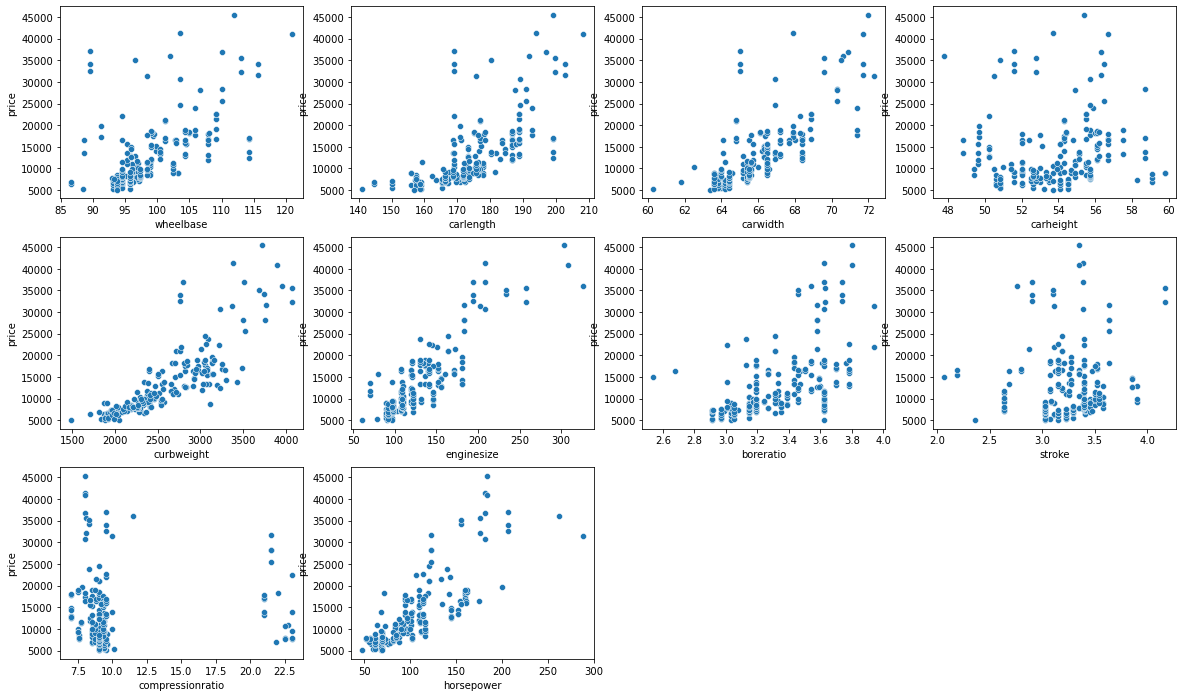

<Figure size 432x288 with 0 Axes>

In [246]:
plt.figure(figsize=(20,12))
plt.subplot(3, 4, 1)
sns.scatterplot(x='wheelbase',y='price', data=cars)
plt.subplot(3, 4, 2)
sns.scatterplot(x='carlength',y='price', data=cars)
plt.subplot(3, 4, 3)
sns.scatterplot(x='carwidth',y='price', data=cars)
plt.subplot(3, 4, 4)
sns.scatterplot(x='carheight',y='price', data=cars)
plt.subplot(3, 4, 5)
sns.scatterplot(x='curbweight',y='price', data=cars)
plt.subplot(3, 4, 6)
sns.scatterplot(x='enginesize',y='price', data=cars)
plt.subplot(3, 4, 7)
sns.scatterplot(x='boreratio',y='price', data=cars)
plt.subplot(3, 4, 8)
sns.scatterplot(x='stroke',y='price', data=cars)
plt.subplot(3, 4, 9)
sns.scatterplot(x='compressionratio',y='price', data=cars)
plt.subplot(3, 4, 10)
sns.scatterplot(x='horsepower',y='price', data=cars)
plt.show()
plt.tight_layout()

From the above plots, we can observe that compression ratio, stroke and height of the car do not have a significant effect on the price of the car. Hence, these can be eliminated from the dataset.

In [247]:
cars=cars.drop(['compressionratio','stroke','carheight'], axis=1)
cars.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,111,5000,21,27,13495.0
1,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,111,5000,21,27,16500.0
2,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,6,152,mpfi,2.68,154,5000,19,26,16500.0
3,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,4,109,mpfi,3.19,102,5500,24,30,13950.0
4,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,5,136,mpfi,3.19,115,5500,18,22,17450.0


Next, we combine the variables highwaympg and citympg into one variable: fuel_efficiency. As per standard, citympg holds 55% weightage while highwaympg holds 45%.

In [248]:
cars['fuel_efficiency']=cars['highwaympg']*0.45+cars['citympg']*0.55
cars=cars.drop(['highwaympg','citympg'],axis=1)
cars.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,peakrpm,price,fuel_efficiency
0,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,111,5000,13495.0,23.70
1,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,111,5000,16500.0,23.70
2,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,6,152,mpfi,2.68,154,5000,16500.0,22.15
3,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,4,109,mpfi,3.19,102,5500,13950.0,26.70
4,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,5,136,mpfi,3.19,115,5500,17450.0,19.80


Now, we examine the effect of categorical variables on price.

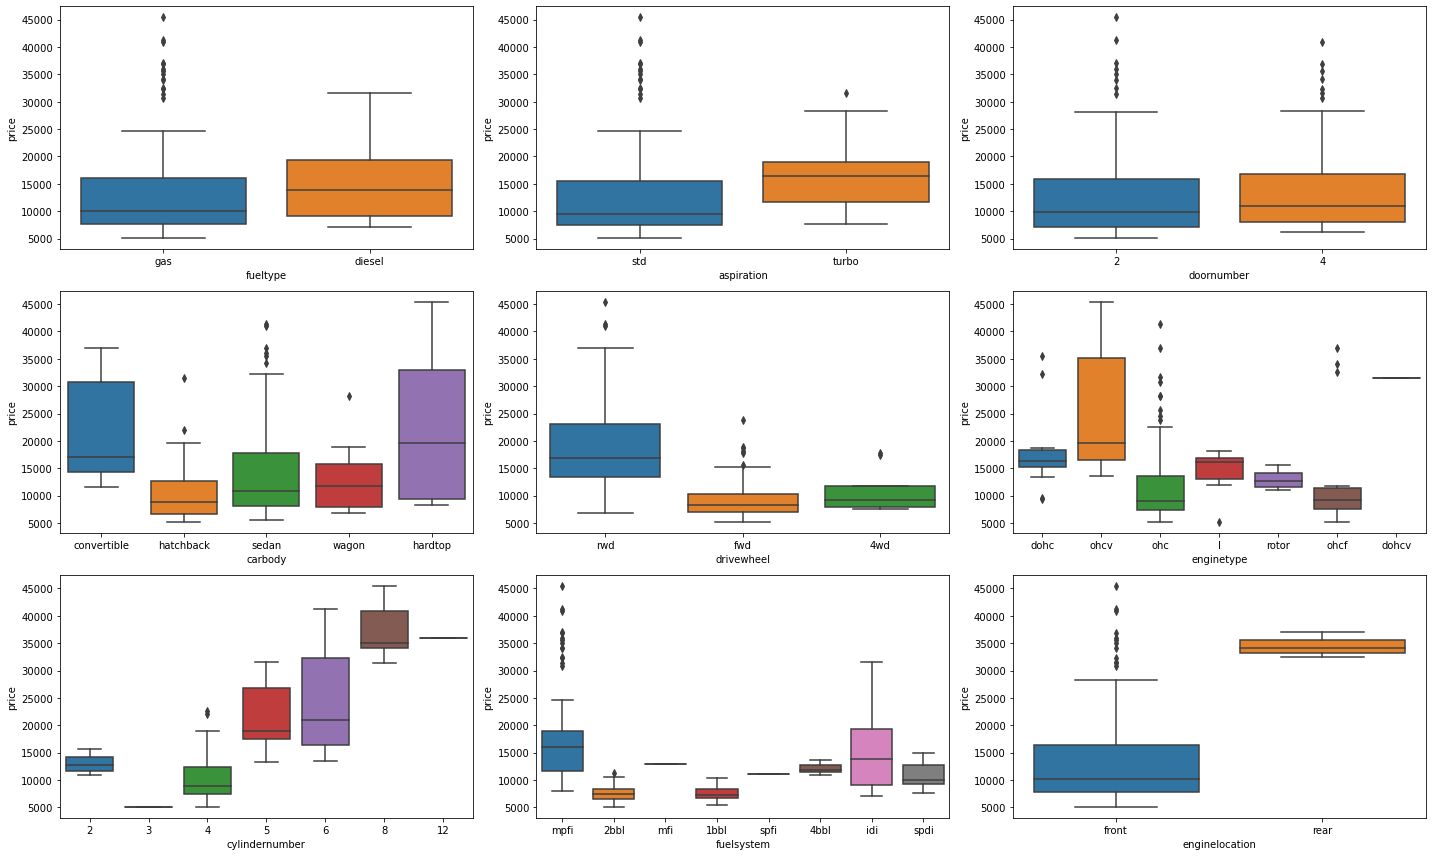

In [249]:
plt.figure(figsize=(20,12))
plt.subplot(3, 3, 1)
sns.boxplot(x='fueltype',y='price', data=cars)
plt.subplot(3, 3, 2)
sns.boxplot(x='aspiration',y='price', data=cars)
plt.subplot(3, 3, 3)
sns.boxplot(x='doornumber',y='price', data=cars)
plt.subplot(3, 3, 4)
sns.boxplot(x='carbody',y='price', data=cars)
plt.subplot(3, 3, 5)
sns.boxplot(x='drivewheel',y='price', data=cars)
plt.subplot(3, 3, 6)
sns.boxplot(x='enginetype',y='price', data=cars)
plt.subplot(3, 3, 7)
sns.boxplot(x='cylindernumber',y='price', data=cars)
plt.subplot(3, 3, 8)
sns.boxplot(x='fuelsystem',y='price', data=cars)
plt.subplot(3, 3, 9)
sns.boxplot(x='enginelocation',y='price', data=cars)
plt.tight_layout()

From the above charts, we can observe that doornumber is an insignificant variable so it can be eliminated from the model.

In [250]:
cars=cars.drop('doornumber',axis=1)

Now, let us look at frequency of each of the categorical variables.

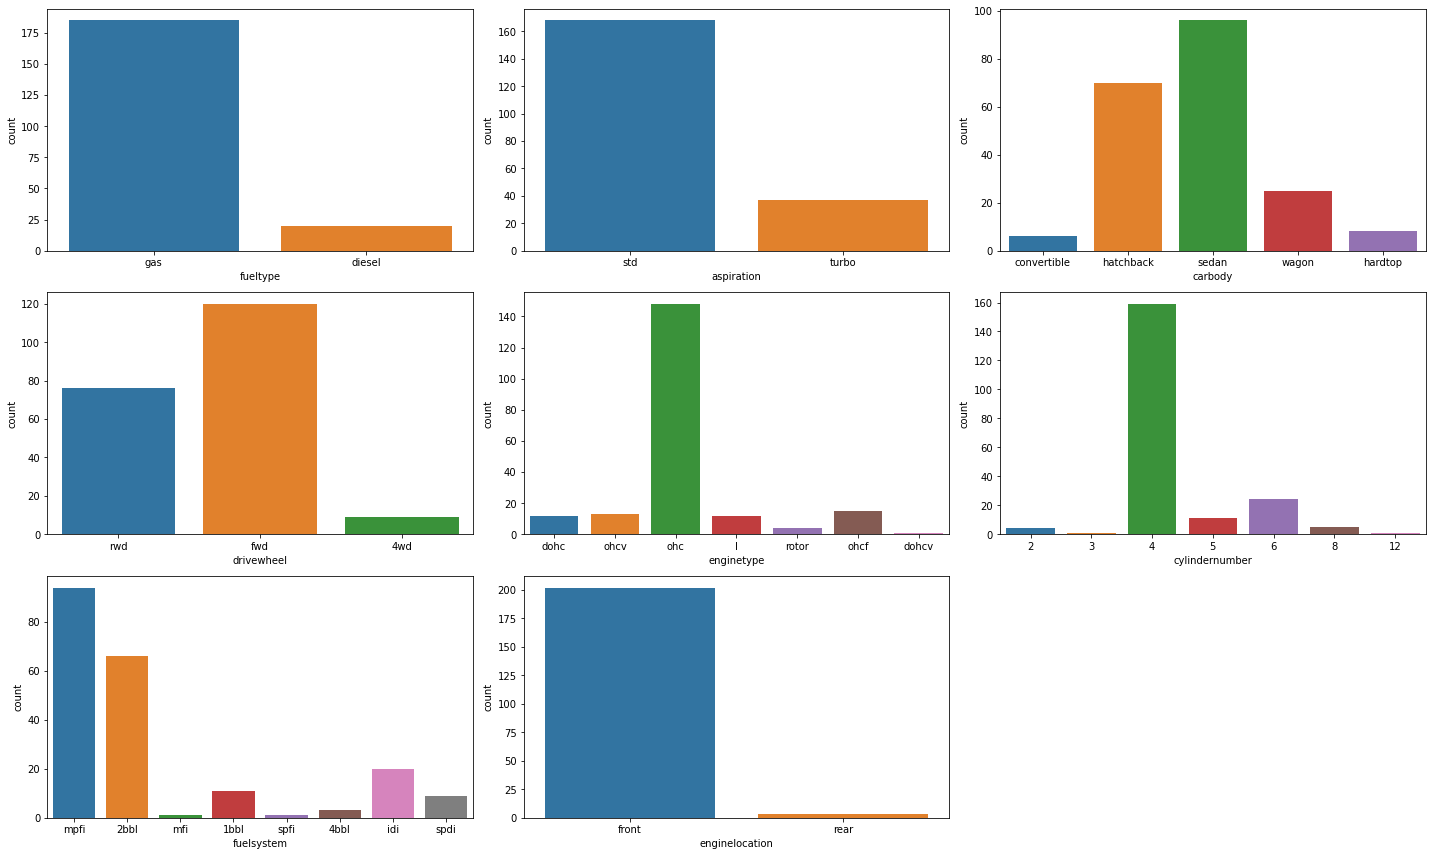

In [251]:
plt.figure(figsize=(20,12))
plt.subplot(3, 3, 1)
sns.countplot(x='fueltype', data=cars)
plt.subplot(3, 3, 2)
sns.countplot(x='aspiration', data=cars)
plt.subplot(3, 3, 3)
sns.countplot(x='carbody', data=cars)
plt.subplot(3, 3, 4)
sns.countplot(x='drivewheel', data=cars)
plt.subplot(3, 3, 5)
sns.countplot(x='enginetype', data=cars)
plt.subplot(3, 3, 6)
sns.countplot(x='cylindernumber', data=cars)
plt.subplot(3, 3, 7)
sns.countplot(x='fuelsystem', data=cars)
plt.subplot(3, 3, 8)
sns.countplot(x='enginelocation', data=cars)
plt.tight_layout()

From the above graphs, we can observe that enginelocation variable has cardinality issue(very low freq of rear category), so it can be eliminated. 

In [252]:
cars=cars.drop('enginelocation',axis=1)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fueltype         205 non-null    object 
 1   aspiration       205 non-null    object 
 2   carbody          205 non-null    object 
 3   drivewheel       205 non-null    object 
 4   wheelbase        205 non-null    float64
 5   carlength        205 non-null    float64
 6   carwidth         205 non-null    float64
 7   curbweight       205 non-null    int64  
 8   enginetype       205 non-null    object 
 9   cylindernumber   205 non-null    int64  
 10  enginesize       205 non-null    int64  
 11  fuelsystem       205 non-null    object 
 12  boreratio        205 non-null    float64
 13  horsepower       205 non-null    int64  
 14  peakrpm          205 non-null    int64  
 15  price            205 non-null    float64
 16  fuel_efficiency  205 non-null    float64
dtypes: float64(6), i

Now, the list of variables that we will be working are listed above.

# Transformation of Variables

First, let us transform the categorical variables by obtaining dummy variables.

In [253]:
cat_var=['fueltype','aspiration','carbody','drivewheel','enginetype','fuelsystem']
frame_cat=pd.get_dummies(cars[cat_var], drop_first=True)
cars=pd.concat([cars,frame_cat],axis=1)
cars=cars.drop(['fueltype','aspiration','carbody','drivewheel','enginetype','fuelsystem'],axis=1)
cars

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,peakrpm,price,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,2548,4,130,3.47,111,5000,13495.0,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,4,130,3.47,111,5000,16500.0,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,6,152,2.68,154,5000,16500.0,...,0,1,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,4,109,3.19,102,5500,13950.0,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,5,136,3.19,115,5500,17450.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,4,141,3.78,114,5400,16845.0,...,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,3049,4,141,3.78,160,5300,19045.0,...,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,3012,6,173,3.58,134,5500,21485.0,...,0,1,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,3217,6,145,3.01,106,4800,22470.0,...,0,0,0,0,0,1,0,0,0,0


Next, we transform the numerical variables.

In [254]:
cars_train,cars_test=train_test_split(cars,train_size=0.7,random_state=100)

In [255]:
scaler=MinMaxScaler()

In [256]:
num_var=['wheelbase','carlength','carwidth','curbweight','cylindernumber','enginesize','boreratio','horsepower','peakrpm','price','fuel_efficiency']
cars_train[num_var]=scaler.fit_transform(cars_train[num_var])
cars_train.head()

<ipython-input-256-f457e04c7ab2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_train[num_var]=scaler.fit_transform(cars_train[num_var])
/Users/sahil/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,peakrpm,price,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.244828,0.426016,0.291667,0.272692,0.2,0.139623,0.230159,0.083333,0.551020,0.068818,...,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.500388,0.2,0.339623,1.000000,0.395833,0.551020,0.466890,...,0,0,0,0,0,0,0,1,0,0
166,0.272414,0.448780,0.308333,0.314973,0.2,0.139623,0.444444,0.266667,1.000000,0.122110,...,0,0,0,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.411171,0.2,0.260377,0.626984,0.262500,0.346939,0.314446,...,0,0,0,0,0,0,0,1,0,0
199,0.610345,0.775610,0.575000,0.647401,0.2,0.260377,0.746032,0.475000,0.387755,0.382131,...,0,0,0,0,0,0,0,1,0,0


# Data Modelling: Recursive Feature Modelling

In [305]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [306]:
x_train=cars_train.drop('price',axis=1)
y_train=cars_train['price']

In [307]:
lr=LinearRegression()
lr.fit(x_train,y_train)
rfe=RFE(lr,14)
rfe.fit(x_train,y_train)

/Users/sahil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=14 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RFE(estimator=LinearRegression(), n_features_to_select=14)

In [308]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('carlength', False, 16),
 ('carwidth', False, 2),
 ('curbweight', True, 1),
 ('cylindernumber', False, 5),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('fuel_efficiency', True, 1),
 ('fueltype_gas', False, 8),
 ('aspiration_turbo', False, 12),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 14),
 ('drivewheel_rwd', False, 3),
 ('enginetype_dohcv', False, 11),
 ('enginetype_l', False, 4),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 15),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 6),
 ('fuelsystem_4bbl', False, 7),
 ('fuelsystem_idi', False, 13),
 ('fuelsystem_mfi', False, 17),
 ('fuelsystem_mpfi', False, 9),
 ('fuelsystem_spdi', False, 10),
 ('fuelsystem_spfi', False, 18)]

In [309]:
col=x_train.columns[rfe.support_]

In [310]:
list(x_train.columns[~rfe.support_])

['carlength',
 'carwidth',
 'cylindernumber',
 'fueltype_gas',
 'aspiration_turbo',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohcv',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mfi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi']

These are the features which are removed by RFE. 

In [311]:
x_train_sm=sm.add_constant(x_train[col])
md=sm.OLS(y_train,x_train_sm)
model=md.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     72.02
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           1.32e-53
Time:                        00:09:07   Log-Likelihood:                 173.07
No. Observations:                 143   AIC:                            -316.1
Df Residuals:                     128   BIC:                            -271.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2770      0.073     -3.776      0.000      -0.422      -0.132
wheelbase             0.2509      0.075      3.361      0.001       0.103       0.399
curbweight            0.4568      0.127      3.609      0.000       0.206       0.707
enginesize            0.4894      0.123      3.978      0.000       0.246       0.733
boreratio            -0.0932      0.050     -1.860      0.065      -0.192       0.006
horsepower            0.5403      0.115      4.684      0.000       0.312       0.769
peakrpm               0.0868      0.048      1.803      0.074      -0.008       0.182
fuel_efficiency       0.2865      0.074      3.897      0.000       0.141       0.432
carbody_hardtop      -0.1727      0.065     -2.638      0.009      -0.302      -0.043
carbody_hatchback    -0.2480      0.048     -5.139      0.000      -0.343      -0.152
carbody_sedan        -0.2281      0.049     -4.618      0.000      -0.326      -0.130
carbody_wagon        -0.2678      0.051     -5.277      0.000      -0.368      -0.167
enginetype_ohc        0.1242      0.021      5.834      0.000       0.082       0.166
enginetype_ohcf       0.1708      0.037      4.632      0.000       0.098       0.244
enginetype_rotor      0.2898      0.052      5.589      0.000       0.187       0.392
==============================================================================
Omnibus:                       23.696   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.154
Skew:                           0.702   Prob(JB):                     1.29e-11
Kurtosis:                       5.540   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the results of RFE, we can see that all our variables are now significant.

### Checking VIF 

It is important to check the variable inflation factor(VIF) for all the variables in our model as this is a measure of multicolinearity. As a practise, variables with higher VIF(>5) will be removed from the model.

In [312]:
list4=[]
for i in range(x_train_sm.shape[1]):
    list4.append(variance_inflation_factor(x_train_sm.values,i))
dff=pd.DataFrame()
dff['Features']=x_train_sm.columns
dff['VIF']=np.round(list4,2)
dff.sort_values(by='VIF',ascending=False)

,Features,VIF
0,const,132.43
2,curbweight,17.47
10,carbody_sedan,14.96
9,carbody_hatchback,12.90
5,horsepower,8.90
3,enginesize,8.84
11,carbody_wagon,7.30
1,wheelbase,5.75
7,fuel_efficiency,4.57
4,boreratio,2.63


First, let us remove the three variables with the highest VIF,'curbweight','carbody_sedan','carbody_hatchback'.

In [328]:
x_train_2=x_train_sm.drop(['curbweight','carbody_sedan','carbody_hatchback'],axis=1)

In [329]:
list4=[]
for i in range(x_train_2.shape[1]):
    list4.append(variance_inflation_factor(x_train_2.values,i))
dff=pd.DataFrame()
dff['Features']=x_train_2.columns
dff['VIF']=np.round(list4,2)
dff.sort_values(by='VIF',ascending=False)

,Features,VIF
0,const,95.87
4,horsepower,7.15
2,enginesize,6.80
6,fuel_efficiency,3.60
3,boreratio,2.50
1,wheelbase,2.39
10,enginetype_ohcf,2.10
9,enginetype_ohc,2.08
5,peakrpm,1.98
11,enginetype_rotor,1.69


Next, let's remove the next highest VIF variable,'horsepower'.

In [330]:
x_train_3=x_train_2.drop(['horsepower'],axis=1)

In [331]:
list4=[]
for i in range(x_train_3.shape[1]):
    list4.append(variance_inflation_factor(x_train_3.values,i))
dff=pd.DataFrame()
dff['Features']=x_train_3.columns
dff['VIF']=np.round(list4,2)
dff.sort_values(by='VIF',ascending=False)

,Features,VIF
0,const,92.16
2,enginesize,3.44
5,fuel_efficiency,2.96
3,boreratio,2.42
1,wheelbase,2.17
9,enginetype_ohcf,2.07
8,enginetype_ohc,1.97
10,enginetype_rotor,1.69
4,peakrpm,1.61
7,carbody_wagon,1.16


Now, all our variables have a VIF less than 5.

In [357]:
x_train_new=sm.add_constant(x_train_3)
md=sm.OLS(y_train,x_train_final)
model=md.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     64.02
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           1.02e-45
Time:                        00:13:44   Log-Likelihood:                 143.25
No. Observations:                 143   AIC:                            -264.5
Df Residuals:                     132   BIC:                            -231.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2318      0.074     -3.122      0.002      -0.379      -0.085
wheelbase            0.2169      0.056      3.904      0.000       0.107       0.327
enginesize           1.1443      0.093     12.292      0.000       0.960       1.328
boreratio            0.0178      0.058      0.305      0.761      -0.098       0.133
peakrpm              0.1139      0.050      2.274      0.025       0.015       0.213
fuel_efficiency     -0.0555      0.072     -0.773      0.441      -0.197       0.086
carbody_hardtop      0.0540      0.056      0.960      0.339      -0.057       0.165
carbody_wagon       -0.0147      0.025     -0.599      0.550      -0.063       0.034
enginetype_ohc       0.0586      0.023      2.503      0.014       0.012       0.105
enginetype_ohcf      0.0598      0.040      1.491      0.138      -0.020       0.139
enginetype_rotor     0.2475      0.061      4.064      0.000       0.127       0.368
==============================================================================
Omnibus:                       16.287   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.197
Skew:                           0.646   Prob(JB):                     1.51e-05
Kurtosis:                       4.434   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

However, now we observe that certain variables have become insignificant, so we will drop these variables.

In [358]:
x_train_final=x_train_new.drop(['carbody_wagon','boreratio','fuel_efficiency','carbody_hardtop'],axis=1)

In [359]:
x_train_final=sm.add_constant(x_train_final)
md=sm.OLS(y_train,x_train_final)
model=md.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     107.9
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           3.18e-49
Time:                        00:14:20   Log-Likelihood:                 142.16
No. Observations:                 143   AIC:                            -270.3
Df Residuals:                     136   BIC:                            -249.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2754      0.042     -6.630      0.000      -0.358      -0.193
wheelbase            0.2227      0.049      4.538      0.000       0.126       0.320
enginesize           1.2186      0.069     17.634      0.000       1.082       1.355
peakrpm              0.1313      0.045      2.932      0.004       0.043       0.220
enginetype_ohc       0.0621      0.023      2.707      0.008       0.017       0.107
enginetype_ohcf      0.0746      0.035      2.142      0.034       0.006       0.144
enginetype_rotor     0.2749      0.055      4.998      0.000       0.166       0.384
==============================================================================
Omnibus:                       18.324   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.236
Skew:                           0.695   Prob(JB):                     2.01e-06
Kurtosis:                       4.573   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Hence, now all variables are significant and have a VIF lower than 5 so these are our final variables. The regression equation can now be given as follows:
Price= -0.2754 + 0.2227*wheelbase + 1.2186*enginesize + 0.1313*peakrpm + 0.0621*enginetype_ohc + 0.0746*enginetype_ohcf + 0.2749*enginetype_rotor

#### Plotting Error Terms

In [363]:
x_train_final=sm.add_constant(x_train_final)
y_train_pred=model.predict(x_train_final)

/Users/sahil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

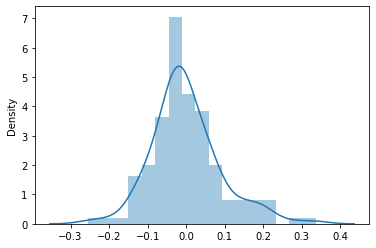

In [364]:
res=y_train-y_train_pred
sns.distplot(res)

# Evaluation of Model

In [366]:
cars_test[num_var]=scaler.transform(cars_test[num_var])
cars_test.head()

<ipython-input-366-2277b51cc1e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_test[num_var]=scaler.transform(cars_test[num_var])
/Users/sahil/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,peakrpm,price,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,0.313793,0.409756,0.341667,0.235066,0.2,0.139623,0.404762,0.091667,0.265306,0.072382,...,0,0,0,1,0,0,0,0,0,0
186,0.368966,0.497561,0.433333,0.305275,0.2,0.181132,0.404762,0.154167,0.448980,0.093295,...,0,0,0,0,0,0,0,1,0,0
59,0.420690,0.596748,0.516667,0.347944,0.2,0.230189,0.563492,0.150000,0.265306,0.102964,...,0,0,0,1,0,0,0,0,0,0
165,0.272414,0.448780,0.308333,0.301396,0.2,0.139623,0.444444,0.266667,1.000000,0.115479,...,0,0,0,0,0,0,0,1,0,0
140,0.231034,0.263415,0.291667,0.291699,0.2,0.177358,0.746032,0.104167,0.102041,0.068652,...,1,0,0,1,0,0,0,0,0,0


In [372]:
final_variables=['wheelbase','enginesize','peakrpm','enginetype_ohc','enginetype_ohcf','enginetype_rotor']
x_test=cars_test[final_variables]
x_test=sm.add_constant(x_test)
y_test=cars_test['price']

In [373]:
y_pred=model.predict(x_test)

In [378]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.811726761915319
0.010062872252206145


### We have finally obtained a pretty good R^2 value and a very low mean squared error which we can use to conclude that we have a pretty solid model.